<a href="https://colab.research.google.com/github/100485446-UC3M/Primera_Practica_Machine_Learning_Grupo16/blob/main/Predicciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicciones Práctica 1
## Esteban Gómez Buitrago 100485446
## Nicolás Alejandro Cuesta García 100495966
## Grupo 16

## Análisis Exploratorio de Datos

Para realizar este projecto utilizamos los set de datos "attrition_availabledata_10.csv" y "attrition_competition_10.csv". Utilizamos estos debido a que la suma de los últimos dos digitos del NIA 100485446 son igual a 10 (4 + 6 = 10).

Al analizar los datos, la primera conclusión a la que se puede llegar es que este es un problema de clasificación. Se está realizando un estudio en el cual a través de algunas variables se va a definir si la clase objetivo, en este caso, el attributo "Attrition" es "Yes" o "No".

Para realizar este projecto será necesario utilizar ciertas librerías de python como pandas, numpy, matplot, etc. El código para la descarga de datos y el análisis de los mismos, está descrito a continuación:

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
#Las librerías necesarias son importadas
import pandas as pd

In [ ]:
#Se lee el fichero de datos
data = pd.read_csv('attrition_availabledata_10.csv.gz')

#Para chequear que sea el set de datos correcto
#print(data.head())

print(f"Número de variables (columnas): {data.shape[1] - 1}")
print(f"Número de instancias (filas): {data.shape[0]}")
valoresvacios = data.isnull().sum()
print("Valores vacíos por columna:\n", valoresvacios.to_dict())
print(f"Número total de valores vacíos: {data.isnull().sum().sum()}")

#Las columnas de tipo object son las categóricas
categorical_cols = data.select_dtypes(include=['object'])
unique_counts = categorical_cols.nunique()
print("\nNúmero de categorías por variable categórica:\n", unique_counts.to_dict())
constant_columns = data.columns[data.nunique() == 1].tolist()
print("\nColumnas constantes:\n", constant_columns)
id_cols = data.columns[data.nunique() == data.shape[0]]
print("Columnas de ID:\n", id_cols)

num_yes = data["Attrition"].eq("Yes").sum()
num_no = data["Attrition"].eq("No").sum()
Total_attrition = num_no + num_yes
if Total_attrition == data.shape[0]:
  print(f"\nNúmero de empleados que dejaron la empresa (Attrition = Yes): {num_yes}")
  print(f"Número de empleados que no dejaron la empresa (Attrition = No): {num_no}")
else:
  print("Error en el número de instancias, hay valores no reconocidos")


Número de variables (columnas): 30
Número de instancias (filas): 2940
Valores vacíos por columna:
 {'hrs': 0, 'absences': 0, 'JobInvolvement': 0, 'PerformanceRating': 0, 'EnvironmentSatisfaction': 15, 'JobSatisfaction': 12, 'WorkLifeBalance': 29, 'Age': 0, 'BusinessTravel': 0, 'Department': 0, 'DistanceFromHome': 0, 'Education': 0, 'EducationField': 0, 'EmployeeCount': 0, 'EmployeeID': 0, 'Gender': 0, 'JobLevel': 0, 'JobRole': 0, 'MaritalStatus': 0, 'MonthlyIncome': 0, 'NumCompaniesWorked': 17, 'Over18': 0, 'PercentSalaryHike': 0, 'StandardHours': 0, 'StockOptionLevel': 0, 'TotalWorkingYears': 5, 'TrainingTimesLastYear': 0, 'YearsAtCompany': 0, 'YearsSinceLastPromotion': 0, 'YearsWithCurrManager': 0, 'Attrition': 0}
Número total de valores vacíos: 78

Número de categorías por variable categórica:
 {'BusinessTravel': 3, 'Department': 3, 'EducationField': 6, 'Gender': 2, 'JobRole': 9, 'MaritalStatus': 3, 'Over18': 1, 'Attrition': 2}

Columnas constantes:
 ['EmployeeCount', 'Over18', 'Sta

El estudio será realizado con 30 variables y 2940 instancias distintas. Es importante resaltar que al número de variables se le resto la variable "Attrition" ya que esta es nuestra variable de calisifcación (objetivo). Después de analizar las variable individualmente encontramos que tenemos variables catégoricas, ordinales y númericas.

Las variabes **catégoricas** son (7):   

*   BusinessTravel
*   Department
*   EducationField
*   Gender
*   JobRole
*   MaritalStatus
*   Over18

Las **númericas** incluyen (15):  

*   hrs
*   absences
*   Age
*   DistanceFromHome
*   MonthlyIncome
*   PercentSalaryHike
*   TotalWorkingYears
*   TrainingTimesLastYear
*   NumCompaniesWorked
*   EmployeeCount
*   EmployeeID
*   StandardHours
*   YearsAtCompany
*   YearsSinceLastPromotion
*   YearsWithCurrManager

Finalmente, entre las **ordinales** están (8):

*   JobInvolvement
*   JobLevel
*   Education
*   PerformanceRating
*   EnvironmentalSatisfaction
*   JobSatisfaction
*   WorkLifeBalance
*   StockOptionLevel

Para definir si una variable es de **alta cardinalidad** o no vamos a tomar el límite de **5 categorías**. Tomando este límite podemos ver que **existen 2 variables que tendrían alta cardinalidad**: EducationField (6) y JobRole (9). El resto de variables categóricas tienen 3 o menos categorías cada una, por lo que no tienen una cardinalidad alta.

Asimismo, es pertinente analizar si tenemos variables que tengan el mismo valor en todas las instancia (**columnas constantes**). Como se puede evidenciar en el código anterior, existen variable como "Over18", que siempre tiene el mismo valor (en este caso "Y"). Las variables **'Over18', 'EmployeeCount' y 'StandardHours' son columnas constantes** y no le van a proporcionar información útil al modelo, será necesario tratar con ellas en el preproceso.

Hay que buscar **columnas de ID**, estas son columnas que tienen un valor diferente para cada instancia, y pueden servir como identificadores. Con el código encontramos que tenemos una columna que cumple con esta descripción. La variable **"EmployeeID" es una columna de ID**.

Entre todas estas instancias tenemos **78 valores vacíos** dividos en 5 variables: WorkLifeBalance (29),  NumCompaniesWorked: (17), EnvironmentSatisfaction (15), Job Satisfaction (12), y TotalWorkingYears (5). Esto es un factor a tener en cuenta a la hora de realizar el preproceso.

Como ya se describió antes, este es un problema de **clasificación**, por ende, es pertinente analizar si está balanceado. La variable "*Attrition*" es nuestro clasificador, esta puede tener el valor de "Yes" o "No". Para saber si está balanceado se debe ver cuantas intancias existen con cada valor. Como se puede ver en el código expuesto previamente, en este caso exiten 474 instancias que tienen en esta variable el valor de "Yes" y 2466 que tienen "No". Con esto se puede concluir que el problema **NO está balanceado**, y se tendrá que utilizar una técnica de balanceo durante el preproceso.


## Preproceso Sin Leakage
Durante esta fase se llevarán a cabo las tareas de preproceso que no tengan riesgo de fuga de datos.

### Eliminación de Columnas Constantes y de ID.
El primer paso que hay que llevar a cabo es eliminar las columnas constantes y de ID, ya que no van a aportar información al modelo. Esto se puede realizar al momento, ya que no hay peligro de "Data/Information Leakage"

In [ ]:
import numpy as np
import sklearn as sk
#Se crea una semilla para poder replicar los resultado y se leen los datos
np.random.seed(100495966)

#Primero removemos las columnas constantes y de ID.
x = data.drop(columns=["Over18", "EmployeeID", "EmployeeCount", "StandardHours", "Attrition"])
y = data["Attrition"]
y =y.map({'Yes': 1, 'No': 0})

### Codificación de Variables Categóricas
Ahora vamos a codificar las variables categóricas, para esto utilizaremos el método de One-Hot-Encoding.

In [ ]:
onehot_columns = ['BusinessTravel', 'Gender','Department', 'EducationField', 'JobRole', 'MaritalStatus']
x = pd.get_dummies(x, columns=onehot_columns, drop_first=True)
x = x.astype({col: "Int64" for col in x.select_dtypes(include=["bool"]).columns})

print(x.head())
print(f"Numero de columnas: {x.shape[1]}")


        hrs  absences  JobInvolvement  PerformanceRating  \
0  7.462297        13               3                  3   
1  7.488597         6               1                  3   
2  7.116541        16               2                  4   
3  9.709125         6               3                  4   
4  6.297729         6               4                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age  \
0                      3.0              3.0              3.0   48   
1                      3.0              4.0              4.0   31   
2                      1.0              1.0              3.0   36   
3                      3.0              3.0              3.0   49   
4                      3.0              2.0              3.0   40   

   DistanceFromHome  Education  ...  JobRole_Human Resources  \
0                12          4  ...                        0   
1                 2          2  ...                        0   
2                14          3  

## Preproceso con Leakage
Vamos a llevar a cabo las tareas que posean riesgo de fuga de datos.

### Evaluación Interna
Vamos a realizar una evaluación interna para determinar cualés son los tipos de normalización, imputación que dan mejores resultados. También seleccionaremos los mejores atributos, métodos y hiper-parámetros. En esta étapa del proceso de preprocesado hay peligro de fuga de datos (data leakage), por este motivo separaremos los datos en un grupo de entrenamiento y uno de testeo, para evitar una posible fuga de datos.


#### Balanceo de datos
Antes de analizar cuál es la mejor combinación de escalado y imputación, se debe tratar un tema importante. En la fase de EDA, se concluyó que este problema está desbalanceado, es vital balancearlo dividiendo los datos en un set de entrenamiento y uno de testeo. Si esto no se hace, el modelo puede empezar a tender a elegir la opción de la que hay más número en el set de entrenamiento sin realmente basarse en las variables. Para tratar el desbalanceo utilizaremos particiones estratificadas.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold as KFolds

# División para la evaluación externa
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=100495966, stratify=y)

# División para evaluación interna (utilizamos esta función porque es desbalanceado)
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=100495966)

interna = {}


#### Selección de Atributos
Antes de elegir el método de imputación y estandarización es importante elegir con qué atributos nos vamos a quedar. En todo set de datos se espera que existan variables con mayor y menor influencia en el resultado. Antes de realizar alguna evaluación es importante hacer una selección de atributos, ya que pueden existir algunos que no sean útiles para el modelo. Existen diferentes maneras de determinar la importancia de las variables, estas son algunas de ellas:

##### Correlación Lineal
Es una medida estadística que muestra el grado de relación lineal que existe entre dos variables. Si existen dos variables que poseen una correlación lineal muy alta, significa que proveen información similar. En algunos casos cuando esto ocurre, una variable se puede eliminar ya que no se pierde una gran cantidad de información (se mantiene la otra variable) y ayuda a reducir la dimensionalidad del problema.

##### Información Mutua
La información mutua muestra qué tanta información aporta un atributo a la variable objetivo. Si hay muy poco valor de información mutua, puede significar que este atributo no aporta significativamente y podría ser eliminado.

##### F-Score
Es una métrica que evalua la relación entre la varianza interclase (qué tan grande es el rango del atributo entre clase) y la varianza intraclase (qué tan disperso está dentro de cada clase). Un valor alto indica que el atributo es relevante para la clasificación, ya que su distribución es muy diferente entre clases.

##### Maximum Relevance Minimum Redundancy (MRMR)
Este es el método que vamos a utilizar para analizar los atributos y determinar con cuáles nos vamos a quedar (y va ser nuestra tarea adicional para mejorar los resultados del modelo). Decidimos hacer esta tarea extra ya que sentimos que realizar una selección de atributos puede mejorar los resultados significativamente. El algoritmo MRMR selecciona atributos que tengan fuerte relación con el objetivo (alta relevancia), y debíl relación con las otros características (baja redundancia). Este toma en cuenta las tres estrategias antes descritas y definine cuáles son los mejores atributos con los que quedarse.

In [ ]:
pip install pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp311-cp311-linux_x86_64.whl size=401293 sha256=e088cee94017420e8c8ffae18385d4cefcc418fd2eb87b56eb32768b78745f04
  Stored in directory: /root/.cache/pip/wheels/a0/d7/97/71bca023a0dbdceab24a556649d661e71114f4eaaf4dda56d6
Successfully built pymrmr


In [ ]:
import pandas as pd
import pymrmr

# Convertimos los datos a un DataFrame para usar pymrmr
df = pd.DataFrame(x_train, columns=x_train.columns)
df['Attrition'] = y_train  # pymrmr requiere la variable objetivo en el mismo DataFrame

# Imputación temporal para poder utilizar pymrmr
df_filled = df.fillna(0)
print("Número de valores NaN después de la imputación:\n", df_filled.isna().sum().sum())

# Número de características a seleccionar
num_features = 30

# Aplicamos MRMR
selected_features = pymrmr.mRMR(df_filled, 'MIQ', num_features)

# Removemos la variable objetivo si ha sido seleccionada
selected_features = [feat for feat in selected_features if feat != 'Attrition']

print("Atributos seleccionados:", selected_features)

# Filtramos el conjunto de entrenamiento y prueba con las características seleccionadas
x_train = x_train[selected_features]
x_test = x_test[selected_features]



Número de valores NaN después de la imputación:
 0
Atributos seleccionados: ['MonthlyIncome', 'absences', 'Age', 'PerformanceRating', 'YearsAtCompany', 'JobRole_Human Resources', 'TotalWorkingYears', 'DistanceFromHome', 'PercentSalaryHike', 'EducationField_Other', 'YearsSinceLastPromotion', 'JobRole_Sales Representative', 'JobInvolvement', 'TrainingTimesLastYear', 'JobRole_Research Director', 'WorkLifeBalance', 'YearsWithCurrManager', 'JobRole_Manager', 'Department_Research & Development', 'StockOptionLevel', 'JobLevel', 'NumCompaniesWorked', 'EducationField_Medical', 'Education', 'JobRole_Research Scientist', 'EnvironmentSatisfaction', 'JobRole_Sales Executive', 'Department_Sales', 'JobSatisfaction']


#### Imputación
Como ya vimos en la fase de EDA, no existe ninguna variable en la que 80% de los datos esten vacíos, por lo que no removeremos ninguna inmediatamente.

Ahora, revisamos si hay alguna fila que tenga un gran número valores nulos en las variables (si la hay, se eliminará). Consideramos que un buen límite es que 1/3 de las variables esten vacías. Es importante resaltar que solo las eliminamos si tienen muchos datos vacíos porque si decidieramos eliminar todas las filas que tienen al menos un valor NA perderíamos muchos datos.

En caso de quedar valores vacíos después de eliminar este tipo de filas, vamos a emplear imputación univaribale. Esto nos va a permitir utilizar dos tipos de imputación, por medio del promedio y del mediano.

In [ ]:
#Revisamos las filas
threshold = (1/3) * x_train.shape[1]
filas_con_muchos_na = x_train[x_train.isna().sum(axis=1) > threshold]
print(f"Filas con más de 30% de sus columnas vacías: {filas_con_muchos_na.shape[0]}")

# Eliminar las filas con más de 30% de valores nulos
x_train= x_train.dropna(thresh=threshold)

print("Se han eliminado las filas pertinentes")


Filas con más de 30% de sus columnas vacías: 0
Se han eliminado las filas pertinentes


#### Normalización
En algunos casos hay una diferencia en la magnitud entre variables. Por ejemplo, la columna "Monthly Income" maneja valores de 6 o 7 digitos; mientras que "Education" tiene valores del 1 al 5. Es importante normalizarlas para que todas tengan un efecto similar en el resultado del modelo. En este caso utilizaremos tres posibilidades de escalados: estandarización, robusto y de rango. Estos emplean diferentes funciones para escalar, por lo que se va determinar cuál es la más efectiva.


#### Desarrollo del código
 Como ya se ha mencionado previamente, el preproceso tiene peligro de fuga de datos. Para evitarla se ha decidido dividir los datos en datos de entrenamiento y testeo. Adicional a esto se utilizará el método de pipelines, para que cada combinación de imputación y normalización sea completamente independiente.

En términos de imputación se provarán los métodos de media y mediana. Estos se van emplear con un Imputador Simple ya que los valores perdidos son relativamente pocos, están distribuidos de forma aleatoria, y no se expera que existan relaciones muy fuertes para predecir estos valores. Asimismo, se espera encontrar una solución computacionalmente no tan costosa (un imputador multi-variable no cumple esta condición).

Para el proceso de normalización se van probar tres métodos: estándar (StandardScaler), de rango (MinMaxScaler), y robusta (RobustScaler). El primer método transfora las cáracteristicas para que tenga media de 0 y desviación estámdar de 1. La segunda reescala los datos para que esten dentro un rango específico. Y la tercera escala utilizando la media y el IQR, volviendolo menos sensible a los outliers.

De estos métodos se va a analizar cuál es la combinación que tiene la mejor relación de "balance accuracy" con tiempo de entrenamiento. La formula que se utilizará es esta:

*Mejor_Combinación = (Max(Balance_Accuracy - TiempoDeEntrenamiento)) x 10*

De esta forma se podrá ver cuál es la combinación que más efectiva y eficientemente completa la tarea. Sin embargo, para elegir la combinación lo haremos solo basandonos en el "Balance accuracy" ya que lo resultados deben ser replicables y si consideramos el tiempo de entrenamiento para la elección, en cada ronda podríamos estar tomando un combinación distinta (los tiempos de entrenamiento no son constantes).

**Nota:**
En este paso del preprocesado se van a crear las pipelines con las diferentes combinación de forma manual para que se entienda en realidad lo que está ocurriendoo (la búsqueda en rejilla se empleará después).

**Uso de ChatGPT:**
En esta sección se empleó una IA Generativa para determinar cuál es la mejor manera de graficar los resultados obtenidos. La IA concluyó que un gráfico de líneas sería la mejor opción. De esta forma se puede representar las "accuracies" y los tiempos de entrenamiento de cada combinación. Al desconocer en detalle los parámetros de la función para realizarla, se le pidió que los explicará y dijera cuál sería la combinación más efectiva para esta situación.

KNN con Median Imputer y RobustScaler: 0.5522039856556429 en 0.025533437728881836 segundos -- Puntuación en criterio de selección: 5.2667054792676105
KNN con Median Imputer y StandardScaler: 0.5534880432079693 en 0.014583508173624674 segundos -- Puntuación en criterio de selección: 5.389045350343446
KNN con Median Imputer y MinMaxScaler: 0.5608531384137878 en 0.02230048179626465 segundos -- Puntuación en criterio de selección: 5.385526566175232
KNN con Mean Imputer y RobustScaler: 0.5503999678006849 en 0.03819600741068522 segundos -- Puntuación en criterio de selección: 5.122039603899998
KNN con Mean Imputer y StandardScaler: 0.5525596872295846 en 0.024181365966796875 segundos -- Puntuación en criterio de selección: 5.283783212627878
KNN con Mean Imputer y MinMaxScaler: 0.5608531384137878 en 0.018577019373575848 segundos -- Puntuación en criterio de selección: 5.42276119040212
Mejor pipeline: KNN con Median Imputer y MinMaxScaler


<ipython-input-52-cd313a78e4ca>:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pipelines, y=scores, ax=ax1, palette="Blues_d")


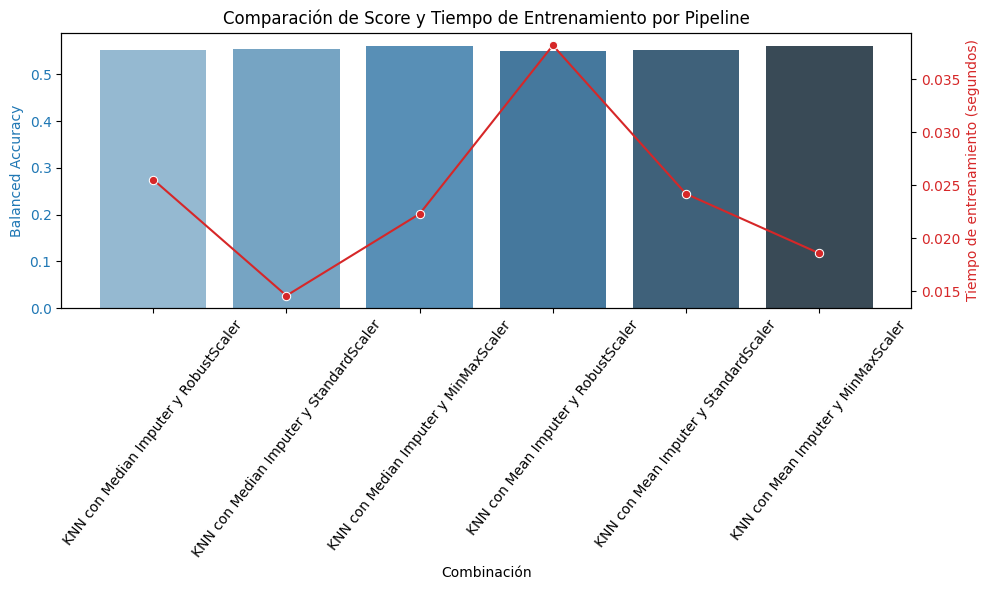

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Definir validación cruzada con semilla
inner = KFold(n_splits=3, shuffle=True, random_state=100495966)

# Alternativa 1, KNN, RobustScaler y Median Imputer
pipeline_K_R_A = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_R_A = cross_validate(pipeline_K_R_A, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Median Imputer y RobustScaler"] = {"score": scores_K_R_A["test_score"].mean(),
                                                    "pipeline": pipeline_K_R_A,
                                                    "fit_time": scores_K_R_A["fit_time"].mean()}

# Alternativa 2, KNN, StandardScaler y Median Imputer
pipeline_K_S_A = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_S_A = cross_validate(pipeline_K_S_A, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Median Imputer y StandardScaler"] = {"score": scores_K_S_A["test_score"].mean(),
                                                      "pipeline": pipeline_K_S_A,
                                                      "fit_time": scores_K_S_A["fit_time"].mean()}

# Alternativa 3, KNN, MinMaxScaler y Median Imputer
pipeline_K_M_A = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_M_A = cross_validate(pipeline_K_M_A, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Median Imputer y MinMaxScaler"] = {"score": scores_K_M_A["test_score"].mean(),
                                                    "pipeline": pipeline_K_M_A,
                                                    "fit_time": scores_K_M_A["fit_time"].mean()}

# Alternativa 4, KNN, RobustScaler y Mean Imputer
pipeline_K_R_B = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", RobustScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_R_B = cross_validate(pipeline_K_R_B, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Mean Imputer y RobustScaler"] = {"score": scores_K_R_B["test_score"].mean(),
                                                  "pipeline": pipeline_K_R_B,
                                                  "fit_time": scores_K_R_B["fit_time"].mean()}

# Alternativa 5, KNN, Standard Scaler y Mean Imputer
pipeline_K_S_B = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_S_B = cross_validate(pipeline_K_S_B, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Mean Imputer y StandardScaler"] ={"score": scores_K_S_B["test_score"].mean(),
                                                   "pipeline": pipeline_K_S_B,
                                                   "fit_time": scores_K_S_B["fit_time"].mean()}

# Alternativa 6, KNN, MinMax Scaler y Mean Imputer
pipeline_K_M_B = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier())
])

scores_K_M_B = cross_validate(pipeline_K_M_B, x_train, y_train, cv=inner, scoring="balanced_accuracy")

interna["KNN con Mean Imputer y MinMaxScaler"] = {"score": scores_K_M_B["test_score"].mean(),
                                                  "pipeline": pipeline_K_M_B,
                                                  "fit_time": scores_K_M_B["fit_time"].mean()}

best_pipeline = None
best_comb = 0
pipelines = []
scores = []
fit_times = []
for name, data in interna.items():
    selec_score = (data["score"] - data["fit_time"]) * 10
    print(f"{name}: {data['score']} en {data['fit_time']} segundos -- Puntuación en criterio de selección: {selec_score }")
    pipelines.append(name)
    scores.append(data["score"])
    fit_times.append(data["fit_time"])
    if data["score"]  > best_comb:
        best_comb = data["score"]
        best_pipeline = data["pipeline"]
        best_name = name

print(f"Mejor pipeline: {best_name}")

# Visualizar los tiempos de entrenamiento y los scores
fig, ax1 = plt.subplots(figsize=(10, 6)) #ax1 es un eje

color = 'tab:blue'
ax1.set_xlabel("Combinación")
ax1.set_ylabel("Balanced Accuracy", color=color)
sns.barplot(x=pipelines, y=scores, ax=ax1, palette="Blues_d")
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=52)

ax2 = ax1.twinx() #Para dibujar dos figuras en el mismo eje
color = 'tab:red'
ax2.set_ylabel("Tiempo de entrenamiento (segundos)", color=color)
sns.lineplot(x=pipelines, y=fit_times, ax=ax2, sort=False, marker="o", color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Comparación de Score y Tiempo de Entrenamiento por Pipeline")
plt.tight_layout()
plt.show()


#### Conclusiones de Imputación y Normalización

Los métodos que fueron elegidos son escalado por rango y impuación por mediana. A parte de esto, hay algunas conclusiones a las que se pueden llegar con los resultados. La primera es que utilizar escalado robusto suele tener moderado o alto coste computacional. Por el otro lado, ambos escenarios con el escalado de rango (MinMax)  resultaron en algunos de los tiempos de entrenamiento más cortos, y los mejores "balanced accuracies". En términos de imputación, utilizar el método de la mediana tomó en general un mayor tiempo de entrenamiento que el método de la media. Finalmente, el escalado estandar mantuvo una "balance accuracy" promedio.

#### Modificación de Hiper-parámetros KNN
Fue seleccionada la combinación de métodos de normalización y imputación que mejor resultados daban. Ahora es pertinente seleccionar los hiper-parámetros que van a utilizarse durante el entrenamiento.

Para el método KNN se modificarán la cantidad de vecinos, los métodos de ponderación (uniform y distance) y el métodod de cálculo de distancia (euclida, manhattan o chebysev). Al haber más de un hiper-parámetro y muchas combinaciones prosibles se va a utilizar el procedimiento de busqueda en rejilla (grid-search) para encontrar la mejor. Para gráficar los resultados se utilizó el mismo tipo de gráfica que en el punto anterior.

La nota con hiper-parámtros por omisión es 0.5609 -- En 0.2035 segundos 
Mejores Hiper-parámetros:

n_neighbors: 5
weights: distance
metric: manhattan
Balanced Accuracy: 0.7430 - Tiempo de entrenamiento: 0.0216 segundos



<ipython-input-53-e7b26d005804>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


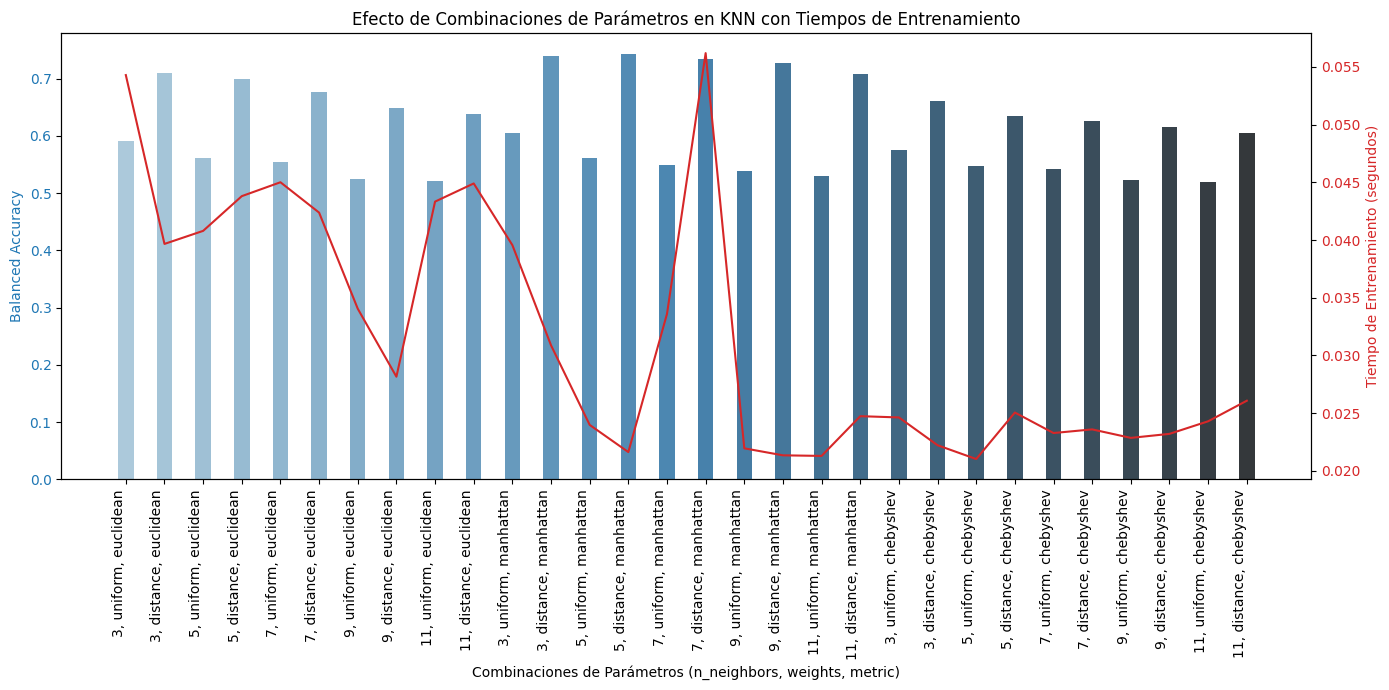

In [ ]:
import time
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

#Evaluar con hiper-parámetros por omisión (la pipeline ya está configurada con KNN)
start_time= time.time()
omision_score = cross_validate(best_pipeline, x_train, y_train, cv=inner, scoring="balanced_accuracy")["test_score"].mean()
end_time = time.time()
training_time = end_time - start_time
print(f"La nota con hiper-parámtros por omisión es {omision_score:.4f} -- En {training_time:.4f} segundos ")

# Definir los parámetros que quieres optimizar
param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 11],  # Número de vecinos para KNN
    "knn__weights": ['uniform', 'distance'],  # Método de ponderación
    "knn__metric": ['euclidean', 'manhattan', 'chebyshev'],  # Distancia
}

grid_search_KNN = GridSearchCV(best_pipeline, param_grid, cv=inner, n_jobs=-1, scoring="balanced_accuracy", verbose=0)

grid_search_KNN.fit(x_train, y_train)


best_model_knn = grid_search_KNN.best_estimator_

results_knn = pd.DataFrame(grid_search_KNN.cv_results_)

#Imprimir Resultados
best_params_knn = best_model_knn.get_params()
print(f"Mejores Hiper-parámetros:\n")
print(f"n_neighbors: {best_params_knn['knn__n_neighbors']}")
print(f"weights: {best_params_knn['knn__weights']}")
print(f"metric: {best_params_knn['knn__metric']}")
print(f"Balanced Accuracy: {grid_search_KNN.best_score_:.4f} - Tiempo de entrenamiento: {grid_search_KNN.cv_results_['mean_fit_time'][grid_search_KNN.best_index_]:.4f} segundos\n")


results_knn['param_combination'] = (
    results_knn['param_knn__n_neighbors'].astype(str) + ', ' +
    results_knn['param_knn__weights'] + ', ' +
    results_knn['param_knn__metric']
)

# Ajustar los datos para que 'n_neighbors' sea numérico
results_knn["param_knn__n_neighbors"] = pd.to_numeric(results_knn["param_knn__n_neighbors"], errors="coerce")

plt.figure(figsize=(14, 7))

#Organizar gráfico del "balanced accuracy"
ax1 = plt.gca()  # Obtener el eje actual
sns.barplot(
    x='param_combination',
    y='mean_test_score',
    data=results_knn,
    ax=ax1,
    palette="Blues_d",
    width=0.4
)


ax1.set_title("Efecto de Combinaciones de Parámetros en KNN con Tiempos de Entrenamiento")
ax1.set_xlabel("Combinaciones de Parámetros (n_neighbors, weights, metric)")
ax1.set_ylabel("Balanced Accuracy", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=90, ha='right')

#Organizar gráfico del tiempo de ejecucción
ax2 = ax1.twinx()
sns.lineplot(
    data=results_knn,
    x='param_combination',
    y='mean_fit_time',
    markers=True,
    color='tab:red',
    ax=ax2
)

ax2.set_ylabel("Tiempo de Entrenamiento (segundos)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Ajustar el gráfico para evitar la superposición de leyendas y etiquetas
plt.tight_layout()
plt.show()


#### Conclusiones HPO KNN
El primer detalle que hay que observar es que después del ajuste de hiper-parámetros se obtuvieron muchos mejores resultados en términos de "balanced accuracy" con respecto a los hiper-parámetros por omisión. En promedio, esta métrica aumentó un 20%, entre omisión y la mejor combinación de hiper-parámetros.

En este caso la combinación que fue más efectiva fue: 5 vecinos, ponderación por distancia, y distancia de mahattan. Asimismo, con relación a cada hiper-parámetro también se pueden observar ciertas tendencias. Por ejemplo, en la mayoría de los casos en los cuales se ponderó con distancia se encontraron mejores resultados que cuando se ponderó uniformemente. También, la distancia con el método de manhattan tuvo una "balanced accuracy" más alta en la mayoría de los casos con respecto a las otro métodos con los mismos otros parámetros. En relación con el número de vecinos no se encontró una tendencia clara, variaba constantemente dependiendo de los otros hiper-parámetros.En los tiempos de entrenamiento, cada vez se encontraron resultados distintos, tampoco existía una tendencia clara.

#### Modificación de Hiper-parámetros Árboles
Ahora se ajustarán los hiper-parámetros de los árboles, para encontrar la mejor combinación posible. En este caso se probarán disitntas profundidades máximas (3, 5, 10, 15, y sin límite), diferente mínimo de instancias para separar (2, 5, 10), y mínimo de muestras por hoja (1, 2 y 5). Es importante resaltar que las pipelines fueron creadas con el método KNN, por lo que será necesario encontrar cualés fueron los métodos de imputación y normalización utilizados y crear una nuvea pipline con el método de árboles.

**Uso de ChatGPT**:Para gráficar los resultados se utilizó un mapa de calor donde también figurarían los tiempos de entrenamiento. Después de probar varios métodos no lograbamos que figurasen en cada cuadrado ambos. Por este motivo se le preguntó a ChatGPT cómo sería esto posible, y presentó la posibilidad de utilizar un doble loop con unas tablas de pivote. Finalmente, se opto por utilizar esta técnica.

La nota con hiper-parámtros por omisión es 0.7385 -- En 0.1652 segundos 
Mejores Hiper-parámetros:

tree__max_depth: 15
tree__min_samples_split: 2
tree__min_samples_leaf: 1
Balanced Accuracy: 0.7499 - Tiempo de entrenamiento: 0.0383 segundos



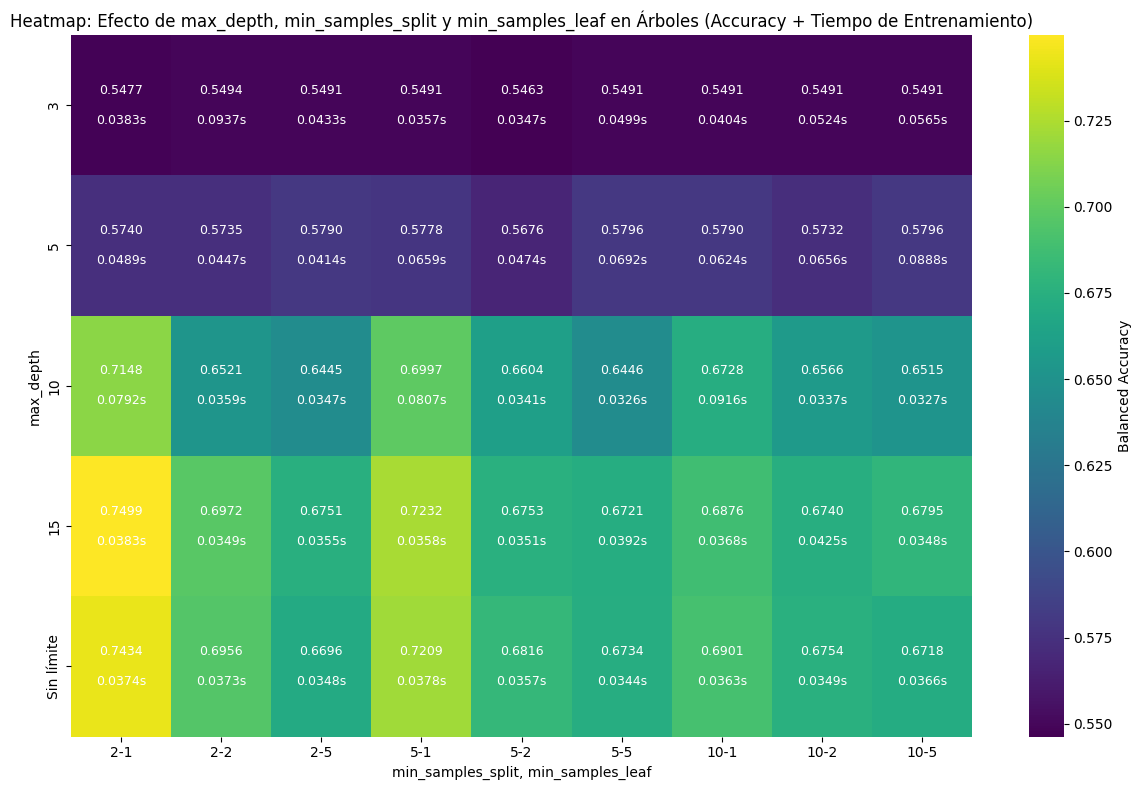

In [ ]:
import time
#Ajuste de Hiperparametros para árboles

#Para encontrar los métodos del mejor pipeline
best_imputer = best_pipeline.named_steps["imputer"]
best_scaler = best_pipeline.named_steps["scaler"]

best_pipeline_tree = Pipeline([
    ("imputer", best_imputer),
    ("scaler", best_scaler),
    ("tree", DecisionTreeClassifier())
])

#Evaluar con hiper-parámetros por omisión
start_time= time.time()
omision_score = cross_validate(best_pipeline_tree, x_train, y_train, cv=inner, scoring="balanced_accuracy")["test_score"].mean()
end_time = time.time()
training_time = end_time - start_time
print(f"La nota con hiper-parámtros por omisión es {omision_score:.4f} -- En {training_time:.4f} segundos ")


param_grid_tree = {
    "tree__max_depth": [3, 5, 10, 15, None],  # Profundidad máxima
    "tree__min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir
    "tree__min_samples_leaf": [1, 2, 5]  # Mínimo de muestras en una hoja
}

grid_search_tree = GridSearchCV(best_pipeline_tree, param_grid_tree, cv=inner, n_jobs=-1, scoring="balanced_accuracy", verbose=0)

grid_search_tree.fit(x_train, y_train)

best_model_tree = grid_search_tree.best_estimator_

# Convertir los resultados del grid search para árboles a un DataFrame
results_tree = pd.DataFrame(grid_search_tree.cv_results_)

#Imprimir Resultados
best_params_tree = best_model_tree.get_params()
print(f"Mejores Hiper-parámetros:\n")
print(f"tree__max_depth: {best_params_tree['tree__max_depth']}")
print(f"tree__min_samples_split: {best_params_tree['tree__min_samples_split']}")
print(f"tree__min_samples_leaf: {best_params_tree['tree__min_samples_leaf']}")
print(f"Balanced Accuracy: {grid_search_tree.best_score_:.4f} - Tiempo de entrenamiento: {grid_search_tree.cv_results_['mean_fit_time'][grid_search_tree.best_index_]:.4f} segundos\n")

# Crear tablas pivote para tratar con mayor fácilidad los datos
# Reemplazar 'None' por "Sin límite" para facilitar el manejo en las tablas pivote
results_tree['param_tree__max_depth'] = results_tree['param_tree__max_depth'].replace({None: 'Sin límite'})
pivot_accuracy = results_tree.pivot_table(
    index='param_tree__max_depth', #Filas
    columns=['param_tree__min_samples_split', 'param_tree__min_samples_leaf'], #Columnas
    values='mean_test_score'
)

pivot_time = results_tree.pivot_table(
    index='param_tree__max_depth',
    columns=['param_tree__min_samples_split', 'param_tree__min_samples_leaf'],
    values='mean_fit_time'
)

#Graficar los resultados
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_accuracy, annot=False, fmt='.4f', cmap="viridis", cbar_kws={'label': 'Balanced Accuracy'})

# Agregar datos de tiempo de entrenamiento
for i in range(pivot_accuracy.shape[0]):
    for j in range(pivot_accuracy.shape[1]):
        accuracy = pivot_accuracy.iloc[i, j] #Buscamos el valor en las tablas pivote
        time = pivot_time.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, f"{accuracy:.4f}\n\n{time:.4f}s", ha='center', va='center', color='white', fontsize=9)

plt.title("Heatmap: Efecto de max_depth, min_samples_split y min_samples_leaf en Árboles (Accuracy + Tiempo de Entrenamiento)")
plt.xlabel("min_samples_split, min_samples_leaf")
plt.ylabel("max_depth")
plt.tight_layout()

plt.show()

#### Conclusiones HPO Árboles
La primera conclusión a la que podemos llegar es que modificar los hiper-parámetros es un proceso muy necesario. Cuando comparamos los hiper-parámetros por omisión con la mejor combinación encontrada de ellos, podemos ver que la "balance accuracy" aumentó aproximadamente 1%, mientras que el tiempo de entrenamiento disminuyó en aproximadamente 30%. Esto es una mejora considerable.

De la misma manera, de estos resultados se pueden sacar algunas tendencias claras. La primera es que a medida que aumenta la profundidad máxima del árbol, aumenta la "balanced accuracy", pero esto sucede a mayor coste computacional. También, en la mayoría de los casos en donde había mínimo de hojas de 1 se dieron resultados relativamente mejores. Con relación al tiempo de entrenamiento, este se vio muy afectado por la profundidad, pero no por los otros hiper-parámetros (fue relativamente similar en cada fila).

Para finalizar, es importante decir que la combinación seleccionada fue 15 como máximo de profundidad, 2 de mínimo de muestras para dividir, y 1 de mínimo de muestras en una hoja.

### Evaluación Externa
De la evaluación interna realizada se puede concluir que existieron un modelo de KNN y una de Árboles más efectivo que los demás. Ahora se realizará la estimación del desempeño con respecto a la variable a futuro (evaluación externa). Las métricas que vamos a utilizar para analizar el desempeño son: balanced accuracy, TPR (accuracy de la clase positiva), TNR (accuracy de la clase negativa) y accuracy. Para facilitar el entendimiento de las métricas utilizaremos una matrix de confusión.

Mejor modelo de KNN: Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', weights='distance'))])
Mejor modelo KNN: 
  Accuracy: 0.9377551020408164
  Balanced Accuracy: 0.8632002833471928
  TPR (Sensitivity): 0.7531645569620253
  TNR (Specificity): 0.9732360097323601

Mejor modelo de Árboles: Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler()),
                ('tree', DecisionTreeClassifier(max_depth=15))])

Mejor modelo Árboles: 
  Accuracy: 0.8959183673469387
  Balanced Accuracy: 0.8357048261418584
  TPR (Sensitivity): 0.7468354430379747
  TNR (Specificity): 0.9245742092457421


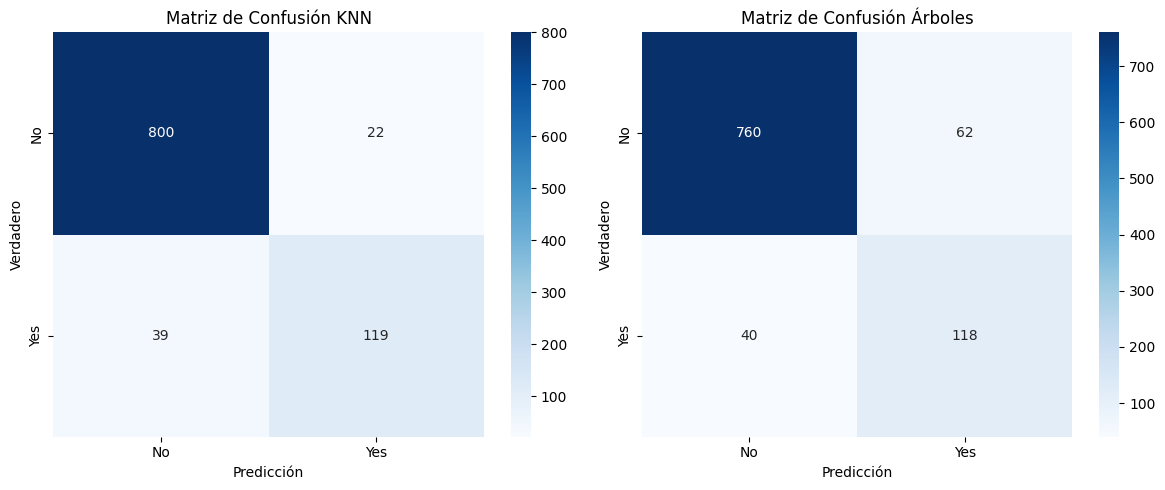

In [ ]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

best_model_knn.fit(x_train, y_train)
y_pred_knn = best_model_knn.predict(x_test)

best_model_tree.fit(x_train, y_train)
y_pred_tree = best_model_tree.predict(x_test)

# Calcular la matriz de confusión para KNN y Árboles
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_tree = confusion_matrix(y_test, y_pred_tree)

TP_KNN = cm_knn[1, 1]  # Verdaderos positivos
TN_KNN = cm_knn[0, 0]  # Verdaderos negativos
FP_KNN = cm_knn[0, 1]  # Falsos positivos
FN_KNN = cm_knn[1, 0]  # Falsos negativos

# Calcular las métricas de KNN
accuracy_KNN = accuracy_score(y_test, y_pred_knn)
balanced_accuracy_KNN = balanced_accuracy_score(y_test, y_pred_knn)
TPR_KNN = TP_KNN / (TP_KNN + FN_KNN)  # Sensitividad (Proporción positivas clasificadas correctamente)
TNR_KNN = TN_KNN / (TN_KNN + FP_KNN)  # Especificidad (Proporción clasificadas postivas que si los son)

# Calcular la matriz de confusión para Árboles
cm_tree = confusion_matrix(y_test, y_pred_tree)
TP_tree = cm_tree[1, 1]  # Verdaderos positivos
TN_tree = cm_tree[0, 0]  # Verdaderos negativos
FP_tree = cm_tree[0, 1]  # Falsos positivos
FN_tree = cm_tree[1, 0]  # Falsos negativos

# Calcular las métricas de Árboles
accuracy_tree = accuracy_score(y_test, y_pred_tree)
balanced_accuracy_tree = balanced_accuracy_score(y_test, y_pred_tree)
TPR_tree = TP_tree / (TP_tree + FN_tree)  # Sensitividad (Proporción positivas clasificadas correctamente)
TNR_tree = TN_tree / (TN_tree + FP_tree)  # Especificidad (Proporción clasificadas postivas que si los son)

# Guardar los resultados
metricas_KNN= {}
metricas_tree= {}

# Imprimir el nombre del mejor modelo y sus hiperparámetros de KNN
print(f"Mejor modelo de KNN: {grid_search_KNN.best_estimator_}")

metricas_KNN["Mejor modelo KNN: "] = {
    "Accuracy": accuracy_KNN,
    "Balanced Accuracy": balanced_accuracy_KNN,
    "TPR (Sensitivity)": TPR_KNN,
    "TNR (Specificity)": TNR_KNN
}
# Mostrar los resultados
for name, metrics in metricas_KNN.items():
    print(f"{name}")
    if isinstance(metrics, dict):  # Verificamos si el valor es un diccionario
        for metric, value in metrics.items():
            print(f"  {metric}: {value}")
    else:  # Si es un valor numérico
        print(f"  Score: {metrics}")


# Imprimir el nombre del mejor modelo y sus hiperparámetros de Árboles
print(f"\nMejor modelo de Árboles: {grid_search_tree.best_estimator_}")

metricas_tree["\nMejor modelo Árboles: "] = {
    "Accuracy": accuracy_tree,
    "Balanced Accuracy": balanced_accuracy_tree,
    "TPR (Sensitivity)": TPR_tree,
    "TNR (Specificity)": TNR_tree
}


# Mostrar los resultados
for name, metrics in metricas_tree.items():
    print(f"{name}")
    if isinstance(metrics, dict):  # Verificamos si el valor es un diccionario
        for metric, value in metrics.items():
            print(f"  {metric}: {value}")
    else:  # Si es un valor numérico
        print(f"  Score: {metrics}")

plt.figure(figsize=(12, 5))
# Dibujar la matriz de confusión de KNN
plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Matriz de Confusión KNN")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")

# Dibujar la matriz de confusión de Árboles
plt.subplot(1, 2, 2)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Matriz de Confusión Árboles")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")

plt.tight_layout()
plt.show()


###Lineales y SVM
Ahora vamos a probar entrenar el modelo con los métodos lineales con regularización L1, sin regularización L1, y con máquinas de soporte de vectores lineales, y SVM RBF. Aquí vamos a observar los resultados cuando se entrenan con parámetros por omisión y cuando se entrena con diferentes combinaciones de hiper-parámetros. Al final vamos a encontrar el mejor modelo. Al final realizaremos un análisis de los resultados y los tiempos de entrenamiento empleando gráficos como en las secciones previas. Asimismo, vamos a utilizar diferentes métodos para extraer de cada técnica cuáles son los atributos más importantes.

Uso de **ChatGPT**: Le preguntamos a una IA cuáles son los métodos más efectivos para determinar la importancia de atributos. Esta concluyó que para modelos lineales se podrían encontrar con ayuda de los coeficientes, y para los no lineales se podría utilizar "permutation importance".


Como extra de trabajo, vimos útil encontrar cuáles fueron las variables más importantes mediante los métodos propuestos, y graficar los resultado. Para modelos lineales se utilizarán los coeficientes, ya que estos indican el peso de cada atributo en la predicción, en otras palabras, cuánto cambia la predicción si se cambia el atributo en una unidad. Por el otro lado, para métodos no lineales, la función de "permutation_importance" lo que hace es de mezclar de forma aleatoria los valores de cada variables una a la vez, y despúes observar cuanto afectó al resultado este cambio. Si una variable importante es mezclada el desempeño del modelo debería cambiar significativamente.


El paso a paso de cómo funciona el código para encontrar estos atributos está descrito por medio de comentarios en el código.

Logistic Regression (sin regularización): Balanced Accuracy = 0.5294, Tiempo total = 0.1021 segundos
Logistic Regression (con L1): Balanced Accuracy = 0.5135, Tiempo total = 0.1148 segundos
SVM (lineal): Balanced Accuracy = 0.5000, Tiempo total = 0.1783 segundos
SVM (RBF): Balanced Accuracy = 0.5076, Tiempo total = 0.3006 segundos

Logistic Regression (sin regularización) - Mejores hiperparámetros: {'classifier__C': 50, 'classifier__penalty': 'l2'}, Balanced Accuracy: 0.5294

Logistic Regression (con L1) - Mejores hiperparámetros: {'classifier__C': 10}, Balanced Accuracy: 0.5278

SVM (lineal) - Mejores hiperparámetros: {'classifier__C': 0.01}, Balanced Accuracy: 0.5000

SVM (RBF) - Mejores hiperparámetros: {'classifier__C': 50, 'classifier__gamma': 'scale'}, Balanced Accuracy: 0.7669

Logistic Regression (sin regularización) - Importancia de atributos:
                              Feature  Importance
16               YearsWithCurrManager    2.847406
6                   TotalWorkingYea

<ipython-input-56-0bf74e60bf70>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance.head(10), palette="Blues_r")


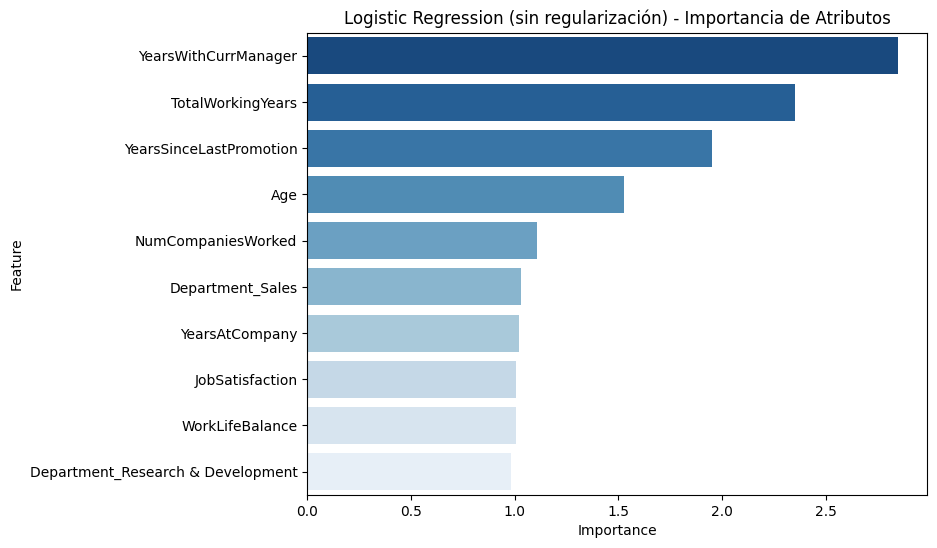


Logistic Regression (con L1) - Importancia de atributos:
                              Feature  Importance
16               YearsWithCurrManager    2.799083
6                   TotalWorkingYears    2.358075
10            YearsSinceLastPromotion    1.947221
2                                 Age    1.476759
21                 NumCompaniesWorked    1.091364
28                    JobSatisfaction    0.998807
27                   Department_Sales    0.995859
15                    WorkLifeBalance    0.980443
18  Department_Research & Development    0.942517
13              TrainingTimesLastYear    0.933157


<ipython-input-56-0bf74e60bf70>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance.head(10), palette="Blues_r")


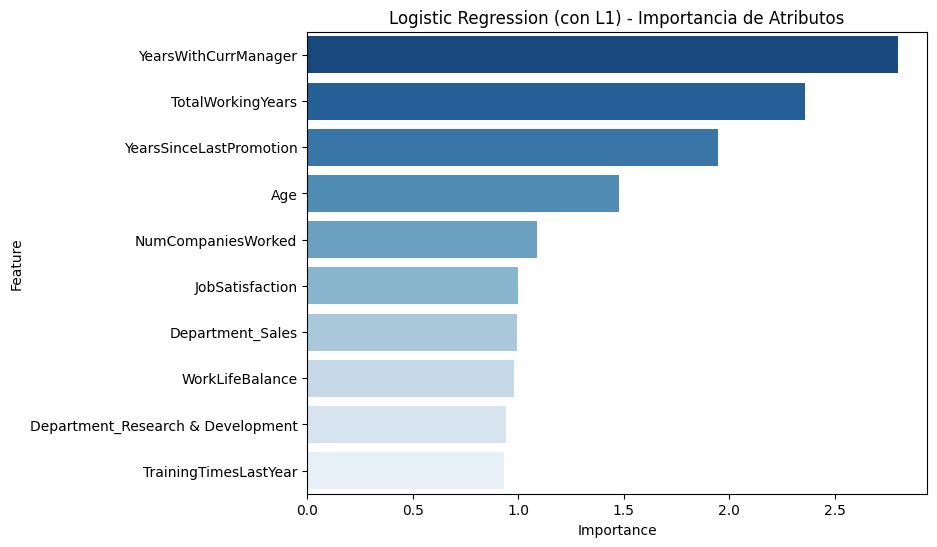


SVM (lineal) - Importancia de atributos:
                              Feature  Importance
4                      YearsAtCompany    0.001005
6                   TotalWorkingYears    0.000789
16               YearsWithCurrManager    0.000508
21                 NumCompaniesWorked    0.000243
13              TrainingTimesLastYear    0.000218
2                                 Age    0.000215
9                EducationField_Other    0.000155
18  Department_Research & Development    0.000155
28                    JobSatisfaction    0.000130
19                   StockOptionLevel    0.000127


<ipython-input-56-0bf74e60bf70>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance.head(10), palette="Blues_r")


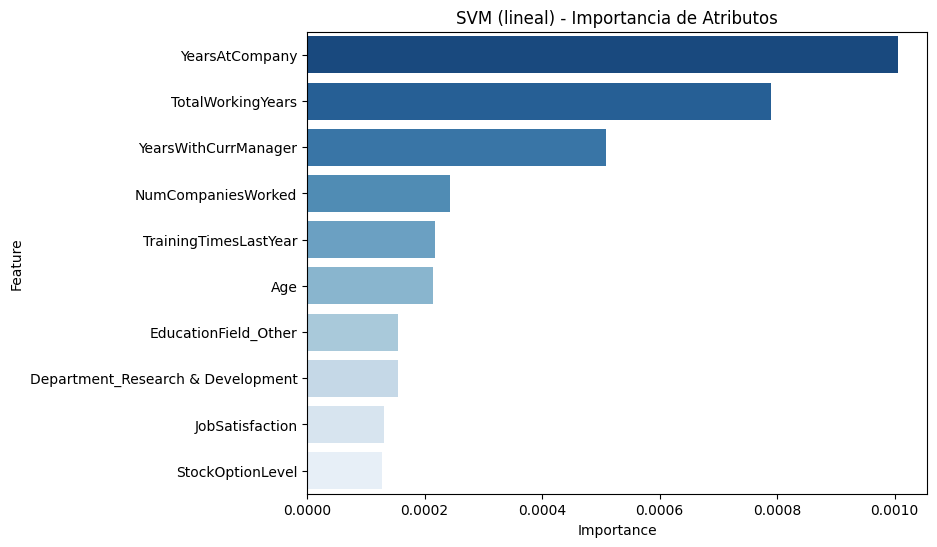


SVM (RBF) - Importancia de atributos (Permutation Importance):
                              Feature  Importance
22             EducationField_Medical    0.105185
25            EnvironmentSatisfaction    0.093112
27                   Department_Sales    0.088220
18  Department_Research & Development    0.085508
24         JobRole_Research Scientist    0.083711
26            JobRole_Sales Executive    0.078750
28                    JobSatisfaction    0.070333
3                   PerformanceRating    0.065860
21                 NumCompaniesWorked    0.055042
7                    DistanceFromHome    0.048470


<ipython-input-56-0bf74e60bf70>:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance.head(10), palette="Reds_r")


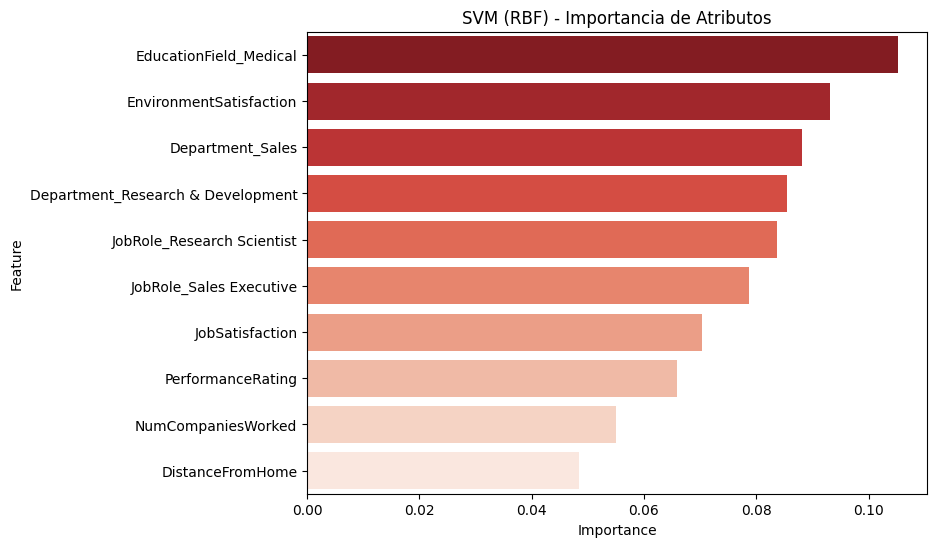

<ipython-input-56-0bf74e60bf70>:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f"param_{param_name}", y="mean_test_score", data=df,  hue=None, palette="Blues_d", ax=ax_accuracy)
<ipython-input-56-0bf74e60bf70>:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f"param_{param_name}", y="mean_fit_time", data=df,  hue=None, palette="Reds_d", ax=ax_time)
<ipython-input-56-0bf74e60bf70>:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f"param_{param_name}", y="mean_test_score", data=df,  hue=None, palette="Blues_d", ax=ax_accuracy)
<i

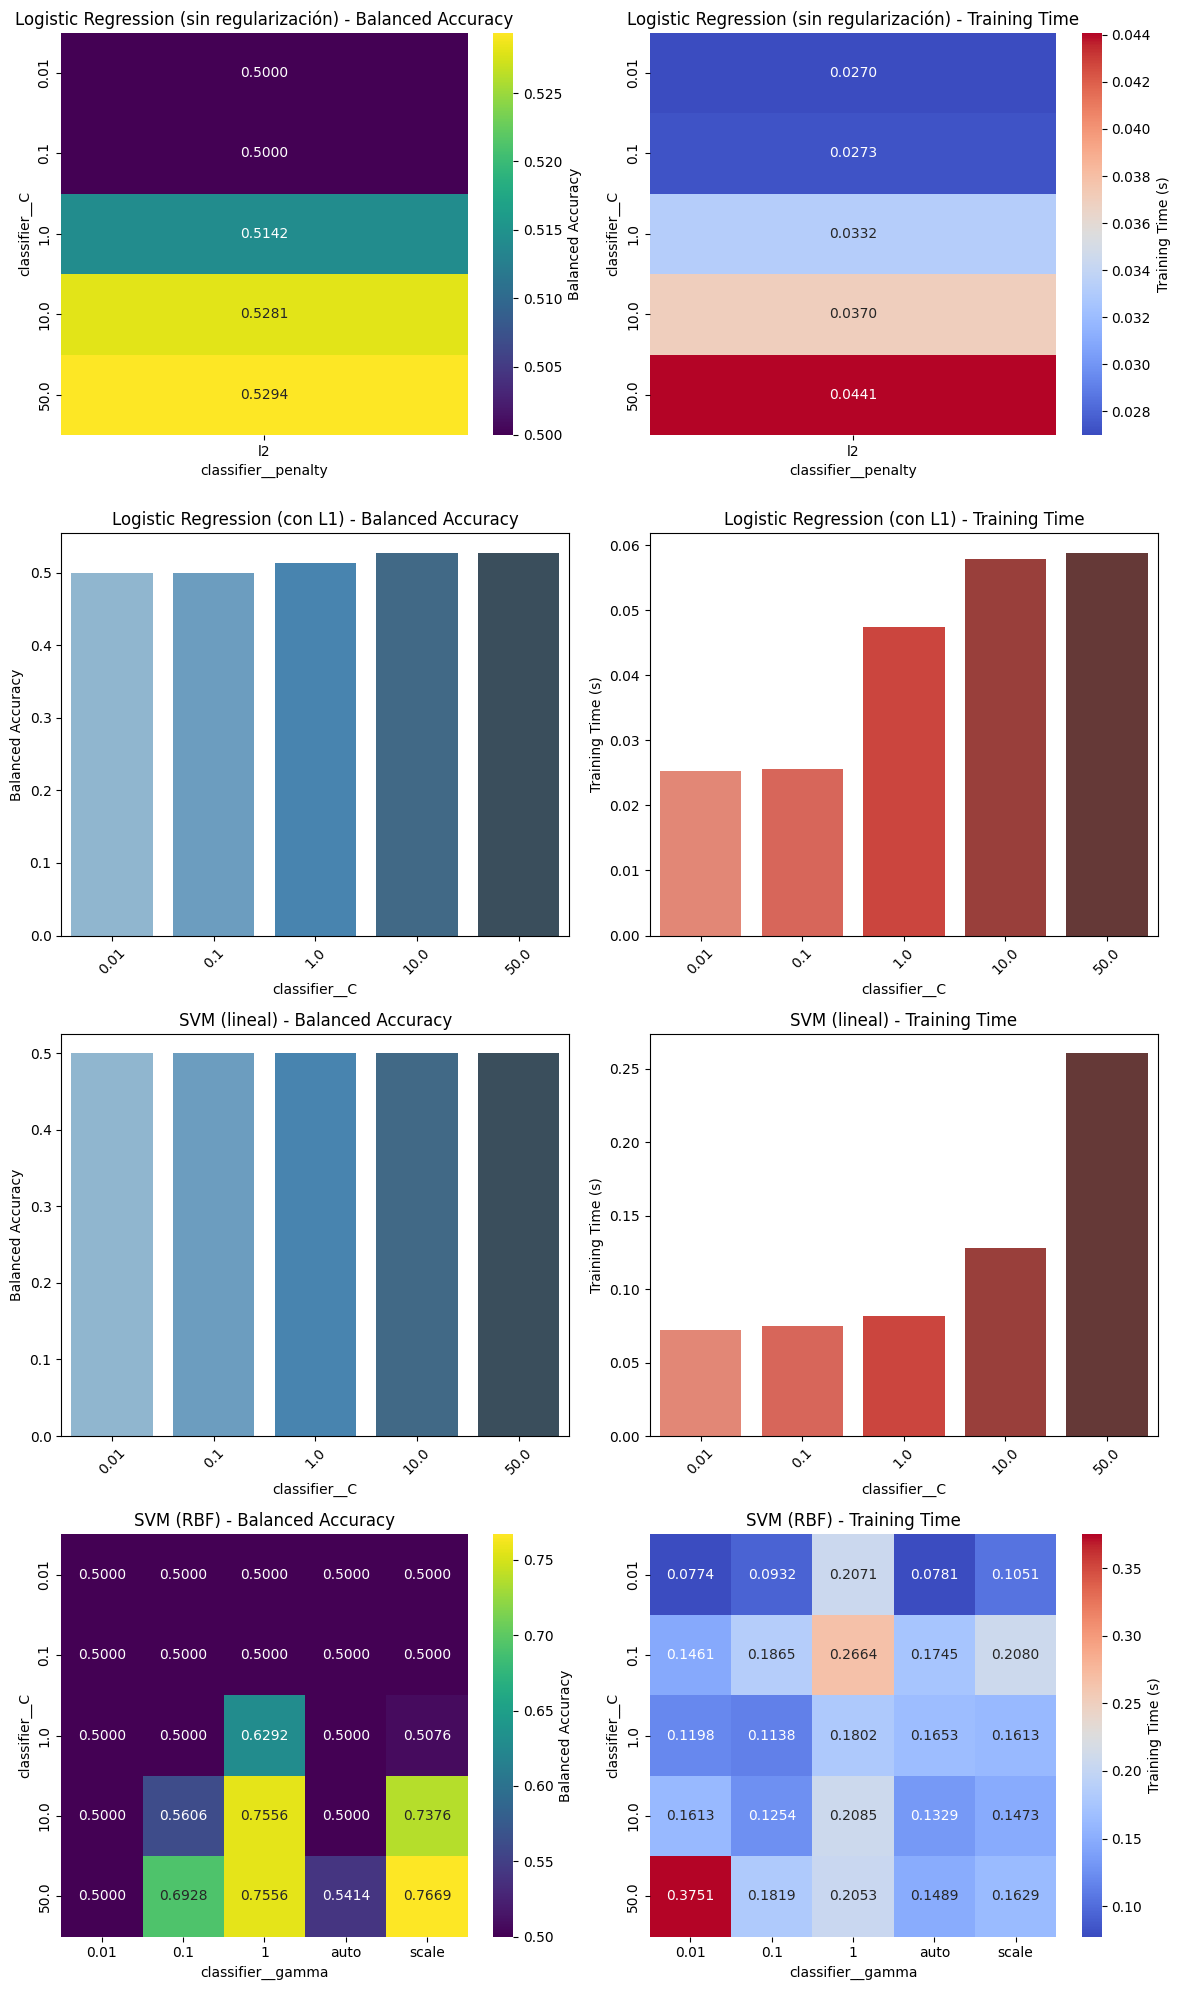

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import time

# Definir pipelines con hiperparámetros por omisión
models = {
    "Logistic Regression (sin regularización)": LogisticRegression(penalty=None, max_iter=1000),
    "Logistic Regression (con L1)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    "SVM (lineal)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf')
      }
for name, model in models.items():
  pipeline = Pipeline([
    ("scaler", best_scaler),
    ("imputer", best_imputer ),
    ("classifier", model)
  ])

  start_time = time.time()
  scores = cross_validate(pipeline, x_train, y_train, cv=inner, scoring="balanced_accuracy")
  end_time = time.time()

  results = {}
  results[name] = {
    "score": scores["test_score"].mean(),
    "fit_time": scores["fit_time"].mean(),
    "total_time": end_time - start_time
  }

  print(f"{name}: Balanced Accuracy = {results[name]['score']:.4f}, Tiempo total = {results[name]['total_time']:.4f} segundos")

# Ajuste de hiperparámetros para los mejores modelos
param_grid = {
    "Logistic Regression (sin regularización)": {"classifier__C": [0.01, 0.1, 1, 10, 50], "classifier__penalty": ["l2"]},
    "Logistic Regression (con L1)": {"classifier__C": [0.01, 0.1, 1, 10, 50]},
    "SVM (lineal)": {"classifier__C": [0.01, 0.1, 1, 10, 50]},
    "SVM (RBF)": {"classifier__C": [0.01, 0.1, 1, 10, 50], "classifier__gamma": ['scale', 'auto', 0.01, 0.1, 1]}
}

best_models = {}
grid_results = {}
for name, params in param_grid.items():
  results[name] = {}
  pipeline = Pipeline([
      ("scaler", best_scaler),
      ("imputer", best_imputer),
      ("classifier", models[name])
  ])

  grid_search = GridSearchCV(pipeline, param_grid=params, cv=inner, n_jobs=-1, scoring="balanced_accuracy", verbose=0)
  grid_search.fit(x_train, y_train)

  best_models[name] = grid_search.best_estimator_
  grid_results[name] = pd.DataFrame(grid_search.cv_results_)

  results[name]["best_score"] = grid_search.best_score_
  results[name]["best_params"] = grid_search.best_params_

  print(f"\n{name} - Mejores hiperparámetros: {grid_search.best_params_}, Balanced Accuracy: {grid_search.best_score_:.4f}")


# Importancia de atributos para modelos lineales
for name, model in best_models.items():
    if hasattr(model.named_steps['classifier'], 'coef_'): #Este atributo solo se encuentra en modelos lineales
        coef = model.named_steps['classifier'].coef_[0] #Los coeficientes muestran el impacto de las variables
        feature_importance = pd.DataFrame({"Feature": x_train.columns, "Importance": np.abs(coef)}) #Para gráficar
        feature_importance = feature_importance.sort_values(by="Importance", ascending=False) #Poner en orden
        print(f"\n{name} - Importancia de atributos:")
        print(feature_importance.head(10)) #Imprimir los diez más importantes

        # Gráficar
        plt.figure(figsize=(8, 6))
        sns.barplot(x="Importance", y="Feature", data=feature_importance.head(10), palette="Blues_r")
        plt.title(f"{name} - Importancia de Atributos")
        plt.show()

# Importancia de atributos para SVM no lineal (Permutation Importance)
if "SVM (RBF)" in best_models:
    model = best_models["SVM (RBF)"]
    #Utiiza la función perm_importance
    perm_importance = permutation_importance(model, x_train, y_train, scoring="balanced_accuracy", n_repeats=10, random_state=100495966)
    feature_importance = pd.DataFrame({"Feature": x_train.columns, "Importance": perm_importance.importances_mean})
    feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

    print("\nSVM (RBF) - Importancia de atributos (Permutation Importance):")
    print(feature_importance.head(10))

    # Gráfica de importancia de atributos
    plt.figure(figsize=(8, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importance.head(10), palette="Reds_r")
    plt.title("SVM (RBF) - Importancia de Atributos")
    plt.show()

n_models = len(grid_results)
n_cols = 2
n_rows = n_models

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten()

#Graficar "balanced accuracy" y tiempo de entrenamiento de cada combinación
for idx, (model_name, df) in enumerate(grid_results.items()):
    ax_accuracy = axes[idx * 2]
    ax_time = axes[idx * 2 + 1]

    # Extrae la lista de parámetros
    p_keys = list(param_grid[model_name].keys())

    # Seguir mismo proceso que para los árboles y knn con tablas de pivote
    if len(p_keys) == 2:
      #En caso de haber dos parámetros
        pivot_accuracy = df.pivot_table(index=f"param_{p_keys[0]}",
                                        columns=f"param_{p_keys[1]}",
                                        values="mean_test_score")
        pivot_time = df.pivot_table(index=f"param_{p_keys[0]}",
                                    columns=f"param_{p_keys[1]}",
                                    values="mean_fit_time")

        # Accuracy
        sns.heatmap(pivot_accuracy, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'Balanced Accuracy'}, ax=ax_accuracy)
        ax_accuracy.set_xlabel(p_keys[1])
        ax_accuracy.set_ylabel(p_keys[0])
        ax_accuracy.set_title(f"{model_name} - Balanced Accuracy")

        # Tiempo de entrenamiento
        sns.heatmap(pivot_time, annot=True, fmt=".4f", cmap="coolwarm", cbar_kws={'label': 'Training Time (s)'}, ax=ax_time)
        ax_time.set_xlabel(p_keys[1])
        ax_time.set_ylabel(p_keys[0])
        ax_time.set_title(f"{model_name} - Training Time")

    elif len(p_keys) == 1:
        # En caso de haber un solo parámetro
        param_name = p_keys[0]
        sns.barplot(x=f"param_{param_name}", y="mean_test_score", data=df,  hue=None, palette="Blues_d", ax=ax_accuracy)
        ax_accuracy.set_xlabel(param_name)
        ax_accuracy.set_ylabel("Balanced Accuracy")
        ax_accuracy.set_title(f"{model_name} - Balanced Accuracy")
        plt.setp(ax_accuracy.get_xticklabels(), rotation=45)

        # Agregar el número de segundos en cada fila
        sns.barplot(x=f"param_{param_name}", y="mean_fit_time", data=df,  hue=None, palette="Reds_d", ax=ax_time)
        ax_time.set_xlabel(param_name)
        ax_time.set_ylabel("Training Time (s)")
        ax_time.set_title(f"{model_name} - Training Time")
        plt.setp(ax_time.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


## Conclusiones HPO de SVM y Métodos Lineales
Lo primero que debemos analizar es cuáles fueron los mejores hiper-parámetros para cada método y sus respectivas tendencias. Para la regrersión lógica sin regularización el méjor método fue utilizar 50 en "classifier_c" y se puede observar que ha medida que aumentamos el número de este parámetro, la "balanced accuracy" aumentó. Es importante decir que al mismo tiempo aumentó considerablemente el tiempo de entrenamiento. Observamos resultados muy similares para la regresión lógica con regularización. Tanto la "balanced accuracy" como el tiempo de entrenamiento tendieron a aumentar a medidad que incrementamos el "clasifier_c". En el SVM lineal vimos que la métrica se mantuvo relativamente constante, y el tiempo de entrenamiento aumentó considerablemente a medida que aumentamos el hiper-parámetro. Finalmente, para el SVM no lineal se consiguieron los mejores resultados con un número mayor en
"classifier_c" y una "gamma" de 1. Sin embargo, es importante resaltar que el tiempo de entrenamiento en este valor de "gamma" tendió a ser más alto con respecto a otras variables.


Logistic Regression (sin regularización) - Mejores hiperparámetros: {'classifier__C': 50, 'classifier__gamma': 'scale'}, Balanced Accuracy: 0.5363
Accuracy: 0.8439, Sensitivity (TPR): 0.0823, Specificity (TNR): 0.9903


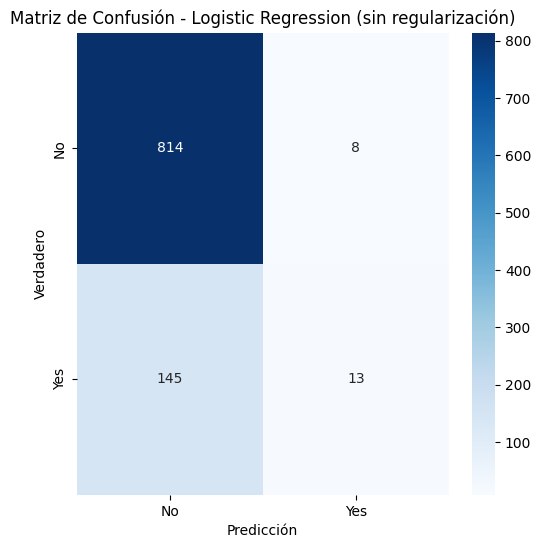


Logistic Regression (con L1) - Mejores hiperparámetros: {'classifier__C': 50, 'classifier__gamma': 'scale'}, Balanced Accuracy: 0.5363
Accuracy: 0.8439, Sensitivity (TPR): 0.0823, Specificity (TNR): 0.9903


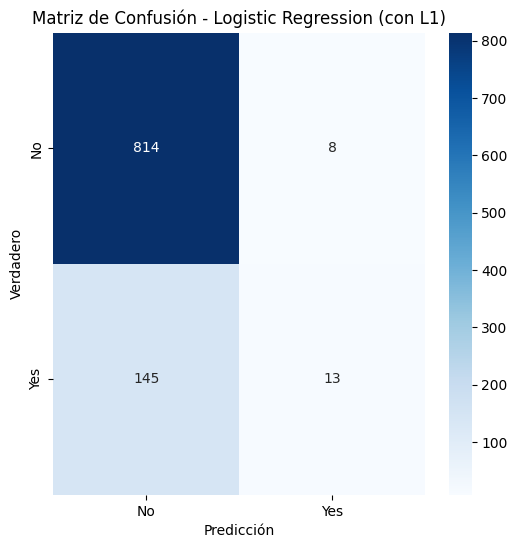


SVM (lineal) - Mejores hiperparámetros: {'classifier__C': 50, 'classifier__gamma': 'scale'}, Balanced Accuracy: 0.5000
Accuracy: 0.8388, Sensitivity (TPR): 0.0000, Specificity (TNR): 1.0000


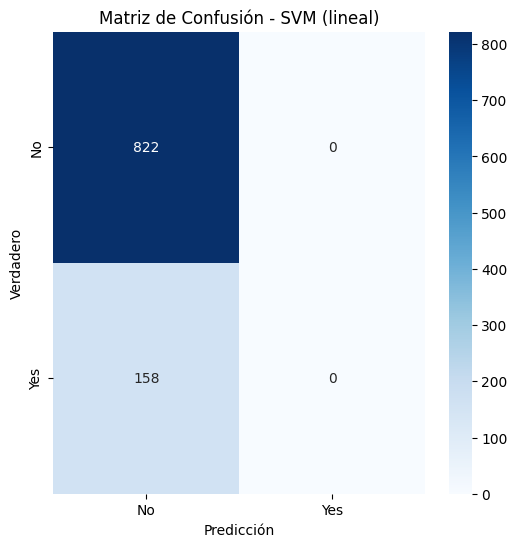


SVM (RBF) - Mejores hiperparámetros: {'classifier__C': 50, 'classifier__gamma': 'scale'}, Balanced Accuracy: 0.8697
Accuracy: 0.9357, Sensitivity (TPR): 0.7722, Specificity (TNR): 0.9672


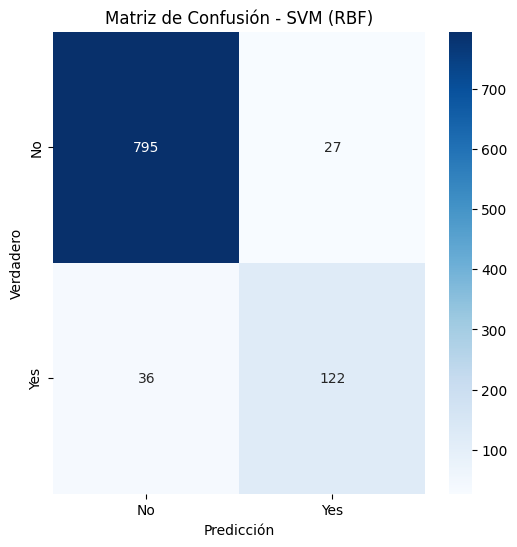

In [ ]:
# Crear matrices de confusión
for name, model in best_models.items():
    model.fit(x_train, y_train)  # Ajustar el modelo con los datos de entrenamiento
    y_pred = model.predict(x_test)  # Hacer predicciones con los datos de prueba

    cm = confusion_matrix(y_test, y_pred)

    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)

    # Imprimir los resultados
    print(f"\n{name} - Mejores hiperparámetros: {grid_search.best_params_}, Balanced Accuracy: {balanced_accuracy:.4f}")
    print(f"Accuracy: {accuracy:.4f}, Sensitivity (TPR): {TPR:.4f}, Specificity (TNR): {TNR:.4f}")

    # Dibujar la matriz de confusión
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Verdadero")
    plt.show()


## Evaluación Modelo Final
Ahora se seleccionará el mejor modelo de todas las opciones evauladas previamente. Basandose en el método y hiper-parámetros del modelo elegido, y se entrenará un nuevo modelo sobre todos los datos. La evaluación del modelo se realizará en un notebook alternativo. Para lograr trasladar el método de imputación, normalización, y los atributos con los que el modelo fue entrenado a este notebook, utilizamos un nuevo fichero llamado "model_data". El segundo notebook va a tener acceso a este fichero y va a poder sacar de él los métodos con el que el modelo fue entrenado. Esto con el objetivo de que pueda aplicar estos mismos cambios al nuevo conjunto de predicción. Esto debe realizarse ya que, por ejemplo, si el modelo fue entrenado sin algunas variables porque estas no se consideraban importantes, si pedimos realizar una predicción sobre unos datos que las incluyen, nos encontraremos con un error. El modelo debe ser entrenado y evaluado en sets de datos que tengan los mismos atributos. Por este motivo, tenemos que de alguna forma pasarle la información de con qué columnas y con qué métodos de normalización e imputación fue entrenado el modelo, para poder aplicar estas transformaciones al nuevo set de datos.

In [ ]:
import pickle
import joblib
from sklearn.model_selection import cross_val_score

# Seleccionar el mejor modelo basado en la evaluación inner
model_scores = {
    "KNN": grid_search_KNN.best_score_,
    "Árbol": grid_search_tree.best_score_
}

# Agregar los modelos lineales y SVM
for name, model in results.items():
    model_scores[name] = model["best_score"]

# Seleccionar el mejor modelo
best_model_name = max(model_scores, key=model_scores.get)

if best_model_name == "KNN":
    best_params = {
        "n_neighbors": best_model_knn.get_params()["knn__n_neighbors"],
        "weights": best_model_knn.get_params()["knn__weights"],
        "metric": best_model_knn.get_params()["knn__metric"]
    }
    best_model = KNeighborsClassifier(**best_params)

elif best_model_name == "Árbol":
    best_params = best_model_tree.get_params()
    best_model = DecisionTreeClassifier(**best_params)

else:  # Si es un modelo lineal o SVM
    best_params = results[best_model_name]["best_params"]
    best_model = best_models[best_model_name].set_params(**best_params)

print(f"El mejor modelo seleccionado es: {best_model_name}")
print(f"Utilizaremos estos hiper-parámetros: {best_params}")

outer = StratifiedKFold(n_splits=3, shuffle=True, random_state=100495966)

#El onehot_column ya fue realizado antes y las columnas de ID y constantes ya fueron removidas también
x = x[selected_features]  #Solo queda aplicar definido en el proceso de MRMR

# Estimar el rendimiento futuro con evaluación outer
cv_scores = cross_val_score(best_model, x, y, cv=outer, scoring="balanced_accuracy")
print(f"Balanced Accuracy estimada (outer CV): {cv_scores.mean():.4f}")

print("Variables guardadas en 'model_data.pkl'")
joblib.dump(best_model, "modelo_final.pkl")

# Crear un diccionario con todas las variables a guardar
model_data = {
    "best_imputer": best_imputer,
    "best_scaler": best_scaler,
    "selected_features": selected_features,
}

# Guardar el diccionario en un archivo
joblib.dump(model_data, "model_data.pkl")

print("Variables guardadas: best_imputer, best_scaler, selected_features y modelo_final.pkl")

#Guardar el modelo final
with open("modelo_final.pkl", "wb") as f:
    pickle.dump(best_model, f)
print("Modelo final guardado en 'modelo_final.pkl'")


El mejor modelo seleccionado es: SVM (RBF)
Utilizaremos estos hiper-parámetros: {'classifier__C': 50, 'classifier__gamma': 'scale'}
Balanced Accuracy estimada (outer CV): 0.8508
Variables guardadas en 'model_data.pkl'
Variables guardadas: best_imputer, best_scaler, selected_features y modelo_final.pkl
Modelo final guardado en 'modelo_final.pkl'
